## Getting Started 
- 회귀 분석(파이프라인 사용)
- Python AutoViz(데이터 자동 시각화)

### Prerequisite Modules

In [21]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()


In [22]:
df = pd.read_csv("/home/kkyu/amr_ws/DL/IoT_Project/environment_test.csv")
df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3)
0,2024-03-09 21:24:14,23.8,24.0,144,41.66
1,2024-03-09 21:24:16,23.8,24.0,144,41.66
2,2024-03-09 21:24:18,23.8,24.0,145,32.86
3,2024-03-09 21:24:19,23.8,24.0,146,27.98
4,2024-03-09 21:24:21,23.8,24.0,144,28.95


In [23]:
df['AQI'] = 0

for index, row in df.iterrows():
    PM_10_value = row['PM-10 (μg/m3)']
    AQI_value = ((100 - 51) / (80 - 31)) * (PM_10_value - 31) + 51
    df.at[index, 'AQI'] = AQI_value

df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI
0,2024-03-09 21:24:14,23.8,24.0,144,41.66,61.66
1,2024-03-09 21:24:16,23.8,24.0,144,41.66,61.66
2,2024-03-09 21:24:18,23.8,24.0,145,32.86,52.86
3,2024-03-09 21:24:19,23.8,24.0,146,27.98,47.98
4,2024-03-09 21:24:21,23.8,24.0,144,28.95,48.95


In [24]:
df['AQI_Bucket'] = pd.cut(df['AQI'], bins=[0, 50, 100, 250, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'])

df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket
0,2024-03-09 21:24:14,23.8,24.0,144,41.66,61.66,Moderate
1,2024-03-09 21:24:16,23.8,24.0,144,41.66,61.66,Moderate
2,2024-03-09 21:24:18,23.8,24.0,145,32.86,52.86,Moderate
3,2024-03-09 21:24:19,23.8,24.0,146,27.98,47.98,Good
4,2024-03-09 21:24:21,23.8,24.0,144,28.95,48.95,Good


In [25]:
df['Date']=range(len(df))
df.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket
0,0,23.8,24.0,144,41.66,61.66,Moderate
1,1,23.8,24.0,144,41.66,61.66,Moderate
2,2,23.8,24.0,145,32.86,52.86,Moderate
3,3,23.8,24.0,146,27.98,47.98,Good
4,4,23.8,24.0,144,28.95,48.95,Good


In [26]:
split_point = round(len(df)*0.8)
train_data = df[:split_point].copy()
train_data.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket
0,0,23.8,24.0,144,41.66,61.66,Moderate
1,1,23.8,24.0,144,41.66,61.66,Moderate
2,2,23.8,24.0,145,32.86,52.86,Moderate
3,3,23.8,24.0,146,27.98,47.98,Good
4,4,23.8,24.0,144,28.95,48.95,Good


In [27]:
test_data = df[split_point:].copy()
test_data.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket
106,106,23.8,24.0,143,12.34,32.34,Good
107,107,23.8,24.0,145,23.09,43.09,Good
108,108,23.8,24.0,145,25.04,45.04,Good
109,109,23.8,24.0,145,31.89,51.89,Moderate
110,110,23.8,24.0,145,17.22,37.22,Good


In [28]:
X_train = train_data['Date']
y_train = train_data['AQI']

In [29]:
X_test = test_data['Date']
y_test = test_data['AQI']

### make_pipeline
- Scikit-learn에서 여러 단계를 거쳐 데이터를 전처리하고 모델을 학습하는 과정을 쉽게 만들어주는 함수
- 따라서 PolynomialFeatures와 LinearRegression을 결합하여 파이프라인을 만들고 이를 사용하여 데이터를 전처리하고 선형 회귀 모델을 학습 가능 

In [30]:
X_train_array = np.array(X_train)
poly = PolynomialFeatures(7, include_bias=False)
poly.fit_transform(X_train_array[:, None])


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 8.00000000e+00, 1.60000000e+01,
        3.20000000e+01, 6.40000000e+01, 1.28000000e+02],
       [3.00000000e+00, 9.00000000e+00, 2.70000000e+01, 8.10000000e+01,
        2.43000000e+02, 7.29000000e+02, 2.18700000e+03],
       [4.00000000e+00, 1.60000000e+01, 6.40000000e+01, 2.56000000e+02,
        1.02400000e+03, 4.09600000e+03, 1.63840000e+04],
       [5.00000000e+00, 2.50000000e+01, 1.25000000e+02, 6.25000000e+02,
        3.12500000e+03, 1.56250000e+04, 7.81250000e+04],
       [6.00000000e+00, 3.60000000e+01, 2.16000000e+02, 1.29600000e+03,
        7.77600000e+03, 4.66560000e+04, 2.79936000e+05],
       [7.00000000e+00, 4.90000000e+01, 3.43000000e+02, 2.40100000e+03,
        1.68070000e+04, 1

In [31]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [32]:
X_train_array = np.array(X_train)
X_train_reshaped = X_train_array[:, np.newaxis]

poly_model.fit(X_train_reshaped, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [33]:
X_test_array = np.array(X_test)
y_predict = poly_model.predict(X_test_array[:, np.newaxis])

In [34]:
y_predict


array([40.79980712, 40.4093906 , 40.00310095, 39.58064854, 39.14174374,
       38.68609691, 38.21341841, 37.72341862, 37.21580789, 36.6902966 ,
       36.1465951 , 35.58441376, 35.00346296, 34.40345304, 33.78409438,
       33.14509734, 32.48617229, 31.80702959, 31.10737961, 30.38693272,
       29.64539927, 28.88248963, 28.09791417, 27.29138325, 26.46260724,
       25.61129651, 24.73716141])

In [35]:
test_data['predict'] = y_predict
test_data.head()

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),AQI,AQI_Bucket,predict
106,106,23.8,24.0,143,12.34,32.34,Good,40.799807
107,107,23.8,24.0,145,23.09,43.09,Good,40.409391
108,108,23.8,24.0,145,25.04,45.04,Good,40.003101
109,109,23.8,24.0,145,31.89,51.89,Moderate,39.580649
110,110,23.8,24.0,145,17.22,37.22,Good,39.141744


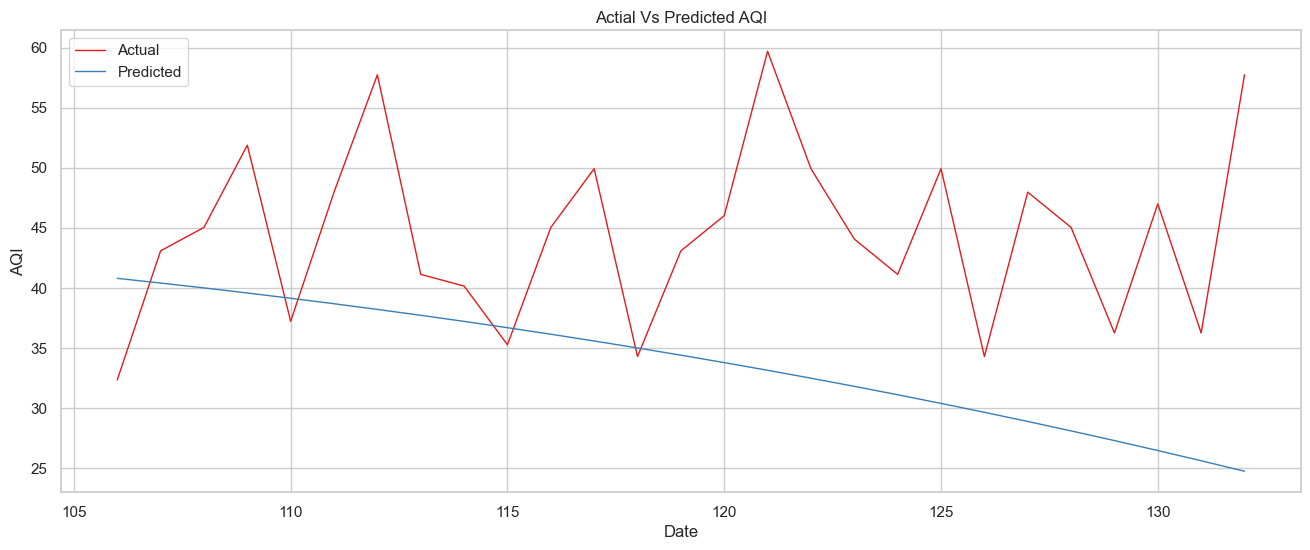

In [36]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='Date', y='AQI', data=test_data, linewidth=1, label='Actual')
sns.lineplot(x='Date', y='predict', data=test_data, linewidth=1, label='Predicted')
plt.legend(loc='upper left') 
plt.title('Actial Vs Predicted AQI')
plt.show()


In [37]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 106 to 132
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Date              27 non-null     int64   
 1   Temperature (°C)  27 non-null     float64 
 2   Humidity (%)      27 non-null     float64 
 3   CO2 (PPM)         27 non-null     int64   
 4   PM-10 (μg/m3)     27 non-null     float64 
 5   AQI               27 non-null     float64 
 6   AQI_Bucket        27 non-null     category
 7   predict           27 non-null     float64 
dtypes: category(1), float64(5), int64(2)
memory usage: 1.8 KB


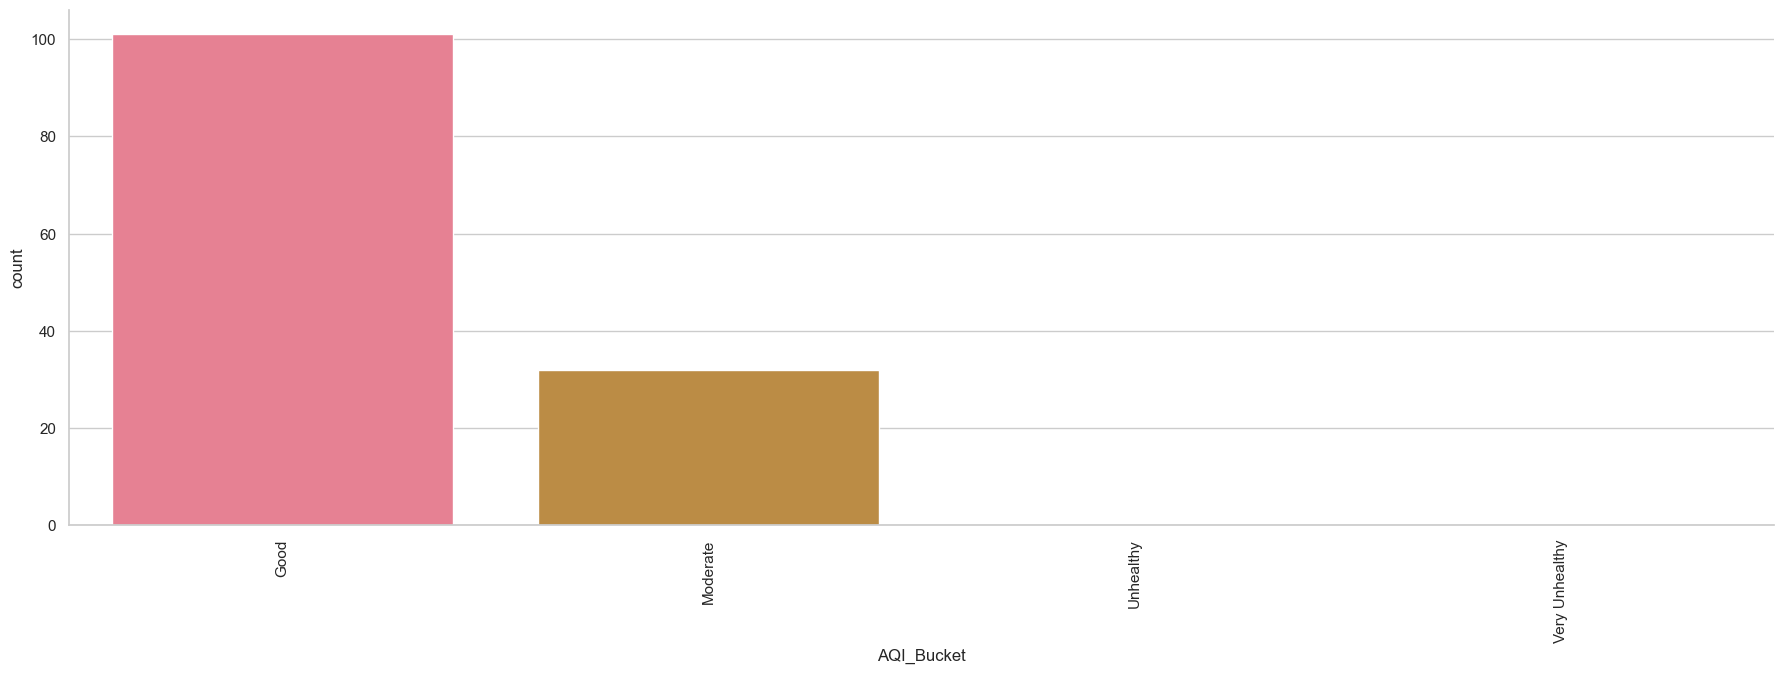

In [38]:
custom_palette = sns.color_palette("husl", 8)  # You can choose any palette you prefer

plot1 = sns.catplot(x="AQI_Bucket", data=df, kind="count", height=6, aspect=3, palette=custom_palette)
plot1.set_xticklabels(rotation=90)

plt.show()


Shape of your Data Set loaded: (1460, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    6 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['date']
To fix these data quality issues in the dataset, import FixDQ

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
date,object,0.000000,100,,,Possible ID column: drop before modeling step.
temp,int64,0.000000,1,5.000000,31.000000,No issue
humidity,int64,0.000000,5,13.000000,100.000000,Column has 2 outliers greater than upper bound (105.00) or lower than lower bound(17.00). Cap them or remove them.
dust,int64,0.000000,2,0.000000,189.000000,Column has 39 outliers greater than upper bound (19.00) or lower than lower bound(-5.00). Cap them or remove them.
pollution,int64,0.000000,20,0.000000,980.000000,Column has 55 outliers greater than upper bound (295.00) or lower than lower bound(-137.00). Cap them or remove them.
co2,float64,0.000000,NA,60.000000,188.407000,No issue


Could not draw Distribution Plot


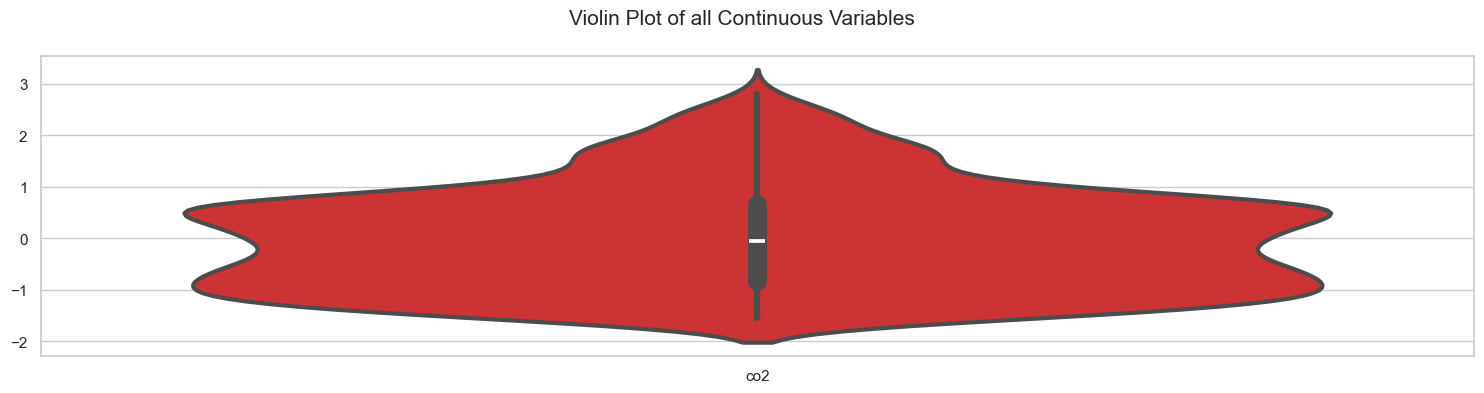

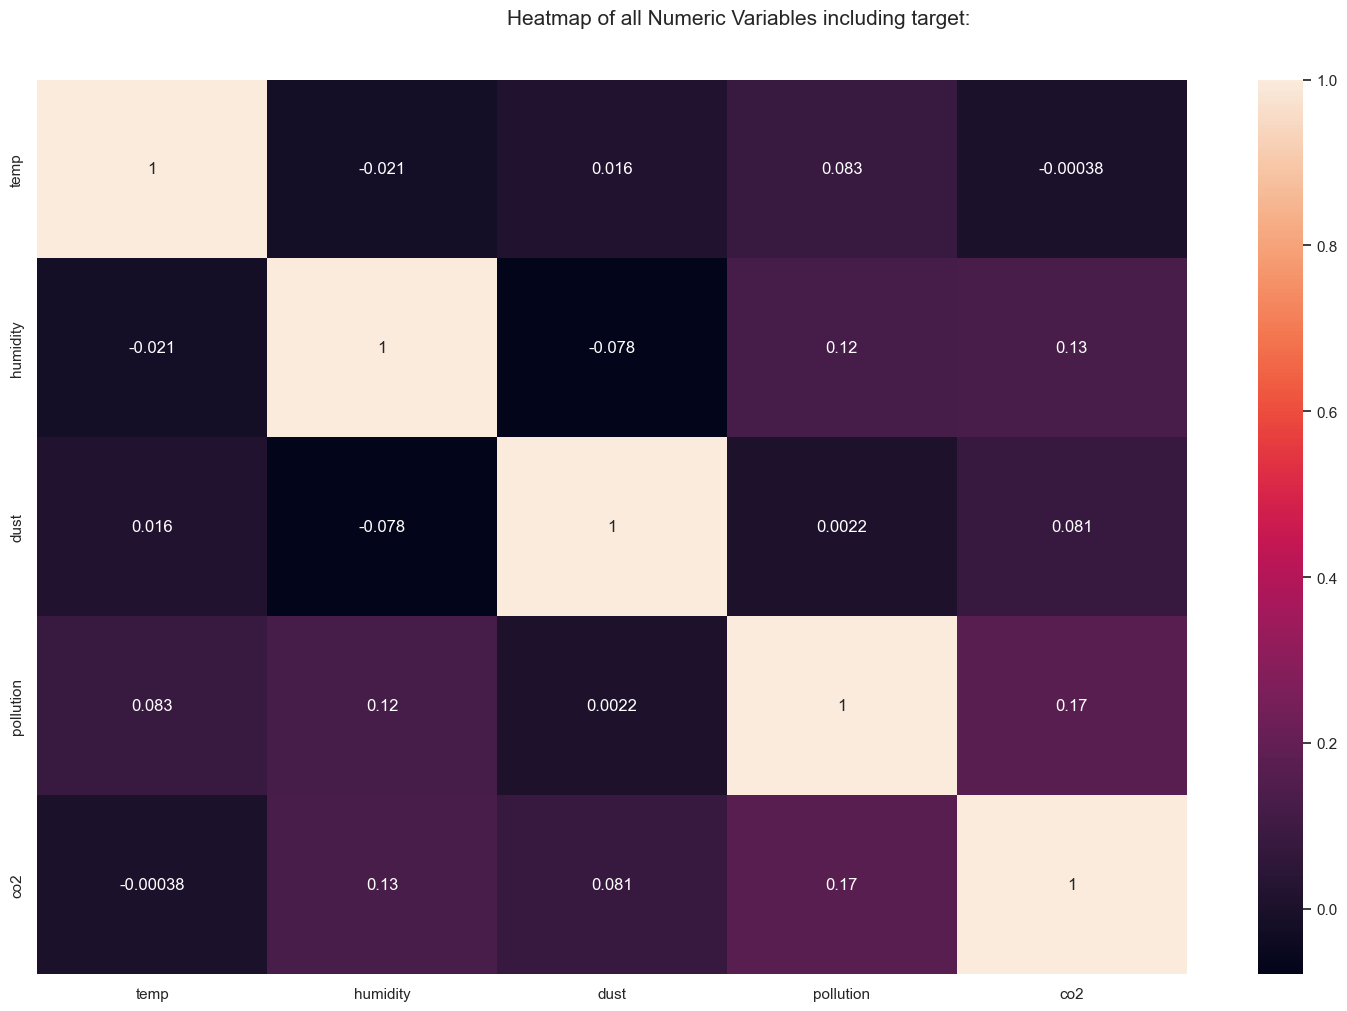

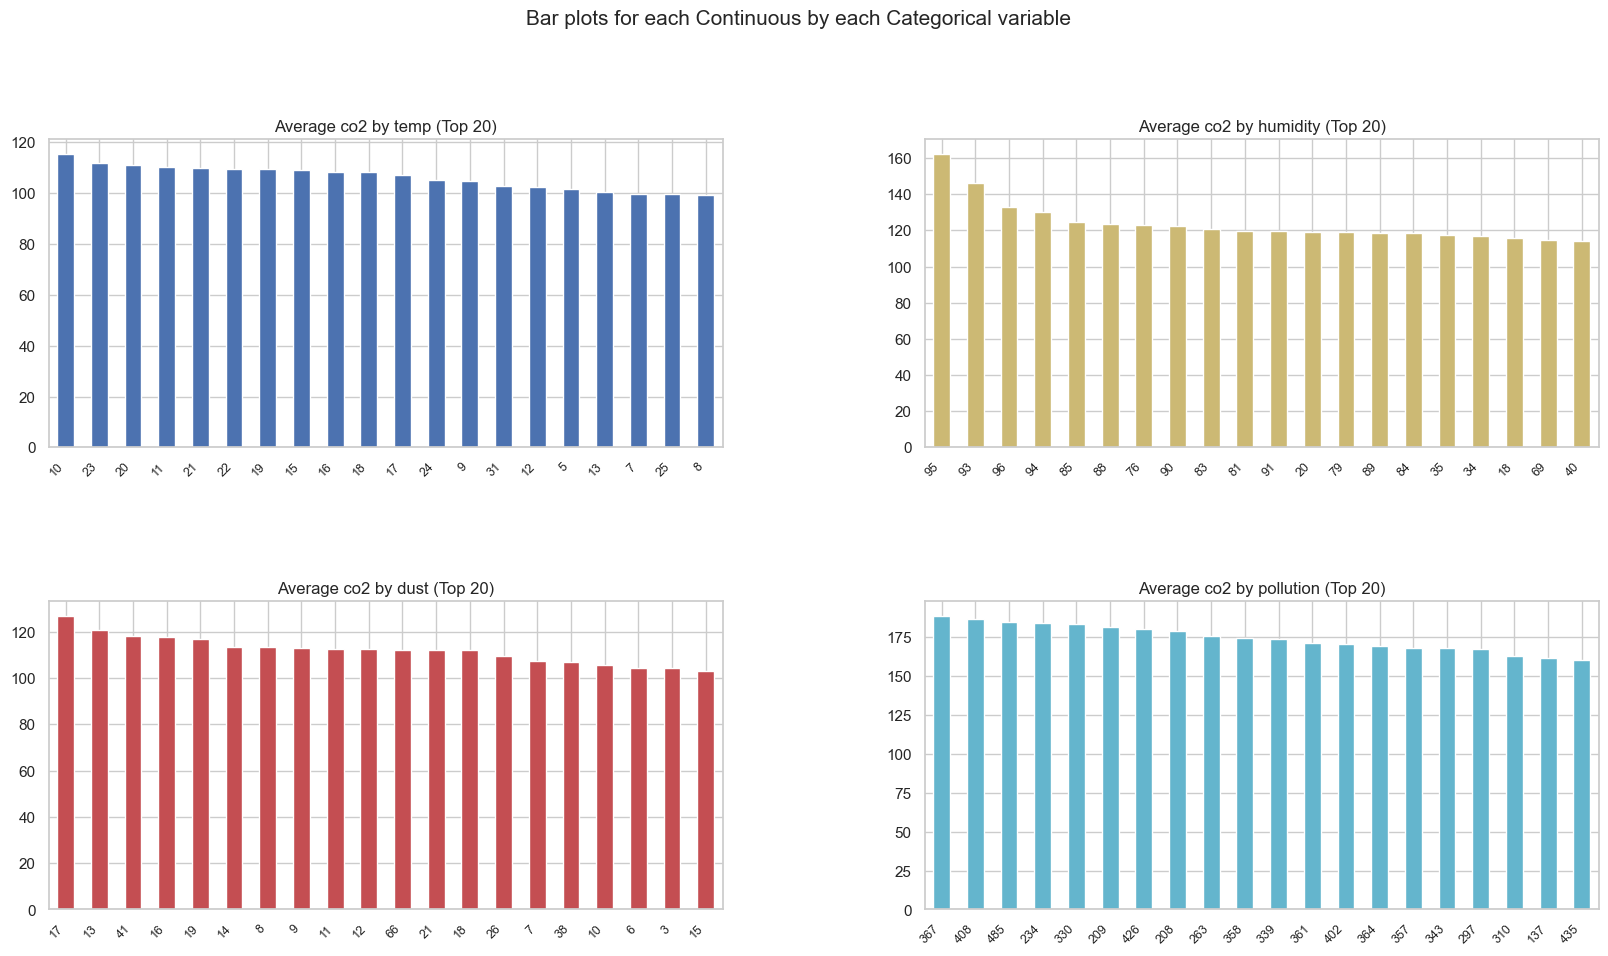

All Plots done
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,date,temp,humidity,dust,pollution,co2
0,2013-01-01,20,84,13,129,72.076
1,2013-01-02,21,92,9,148,64.442
2,2013-01-03,20,87,6,159,64.084
3,2013-01-04,20,71,4,181,60.842
4,2013-01-05,20,86,5,138,61.798
...,...,...,...,...,...,...
1455,2016-12-28,27,68,15,227,74.000
1456,2016-12-29,26,87,14,224,125.000
1457,2016-12-30,25,89,13,187,93.000
1458,2016-12-31,24,87,15,150,89.000


In [39]:
AV.AutoViz("/home/kkyu/amr_ws/DL/IoT_Project/iot-repo-5/data/AQI_test.csv",sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)